<h1>Widhya Task - 1</h1>

<h2>Bitcoin Price Prediction</h2>

<h3>By - Heta R. Patel</h3>

In [128]:
#importing all required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#importing required data
data = pd.read_csv("bitcoin_dataset.csv")

In [5]:
#check data
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [8]:
#shape of data
data.shape

(2906, 24)

In [46]:
#selecting 1024th value from 'btc_market_price' column
data['btc_market_price'][1023]

13.6888

<h3>EDA - checking correlation</h3>

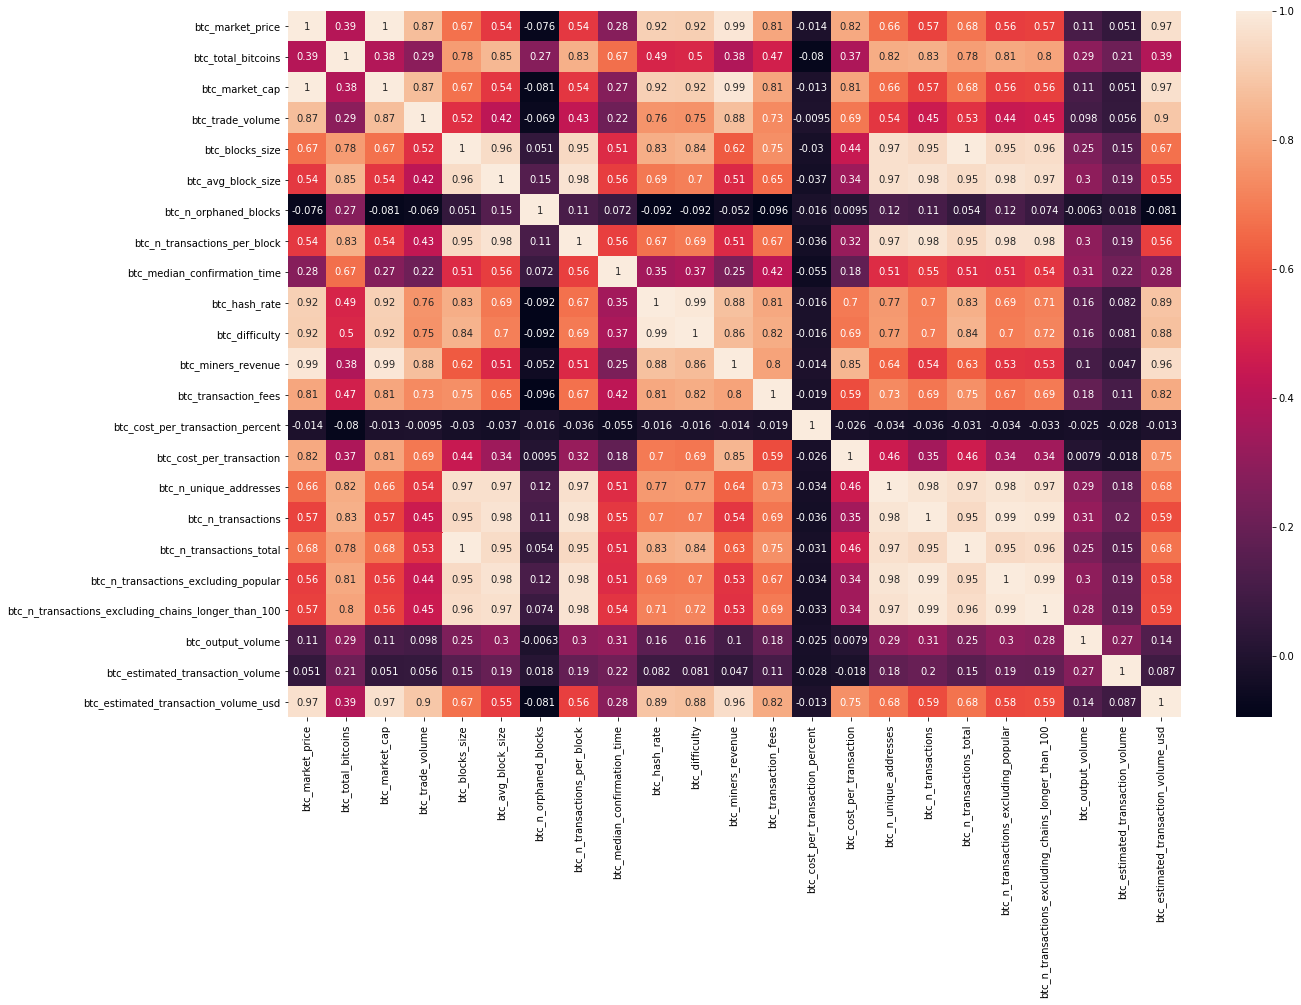

In [62]:
corr=data.corr()
plt.subplots(figsize = (20,13))
sns.heatmap(corr,annot = True)

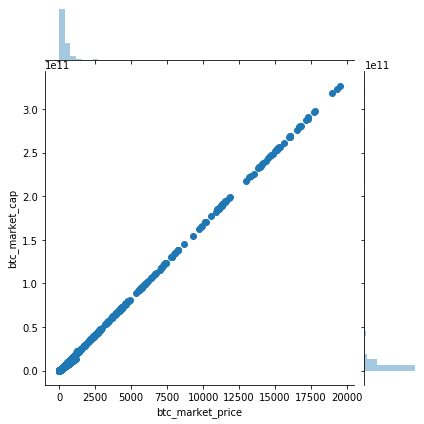

In [61]:
sns.jointplot(data = data, x='btc_market_price',y='btc_market_cap')

Since we need to predict the price of Bitcoin, We can see that 'btc_market_price' is perfectly correlated to 'btc_market_cap'

<h3>Data Cleaning</h3>

In [65]:
data.isna().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [73]:
#filling all NaN values with the mean value
data['btc_total_bitcoins'].fillna(data['btc_total_bitcoins'].mean(skipna=True),inplace=True)
data['btc_trade_volume'].fillna(data['btc_trade_volume'].mean(skipna=True),inplace=True)
data['btc_blocks_size'].fillna(data['btc_blocks_size'].mean(skipna=True),inplace=True)
data['btc_median_confirmation_time'].fillna(data['btc_median_confirmation_time'].mean(skipna=True),inplace=True)
data['btc_difficulty'].fillna(data['btc_difficulty'].mean(skipna=True),inplace=True)
data['btc_transaction_fees'].fillna(data['btc_transaction_fees'].mean(skipna=True),inplace=True)

In [75]:
data.isna().sum().sum()

0

Replaced all NaN values with Column mean

<h3>Model Formulation and Prediction</h3>

In [109]:
#Finding MSE of the model
x = data[['btc_market_cap','btc_n_transactions','btc_miners_revenue',
          'btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']]
y = data['btc_market_price']

In [110]:
x.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [111]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: btc_market_price, dtype: float64

In [112]:
#Split data into train and test
X_train,x_test,Y_train,y_test = train_test_split(x ,y ,test_size = 0.25, random_state = 1)

In [113]:
X_train.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
1911,3.436175e+09,108615,986656.80,9.083983,4.764340e+10,3.836753e+05,2.140821
89,0.000000e+00,173,0.00,0.000000,1.284918e+01,9.200000e-05,74.837229
1776,4.296893e+09,79812,1333123.11,16.703292,3.945767e+10,3.314853e+05,3.211480
2563,1.914085e+10,325913,2381379.00,7.574146,4.410000e+11,3.286693e+06,0.749113
1080,2.285021e+08,56756,82516.20,1.453876,2.968775e+06,2.257953e+01,1.055129


In [114]:
x_test.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
1482,7.773367e+09,66786,2574416.610,38.547250,3.815724e+09,3.129731e+04,0.767646
1145,1.761733e+09,58820,656408.770,11.159619,7.673000e+06,6.179116e+01,2.471282
2662,4.003837e+10,271539,5437774.587,20.675735,5.960000e+11,4.325022e+06,0.772890
432,1.021893e+07,2516,16001.307,6.359820,9.234759e+04,8.630372e-01,20.936641
2264,6.927077e+09,215712,1650450.466,7.651176,1.790000e+11,1.296655e+06,1.356673


In [115]:
Y_train.head()

1911     242.72000
89         0.00000
1776     314.49000
2563    1172.01715
1080      21.30000
Name: btc_market_price, dtype: float64

In [116]:
y_test.head()

1482     621.990000
1145     160.099700
2662    2446.142414
432        1.701000
2264     447.170000
Name: btc_market_price, dtype: float64

In [117]:
#Prediction using LR
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
Y_pred = lr.predict(x_test)

<h3>Actual v/s Predicted</h3>

In [127]:
pred = pd.DataFrame({'Actual Price':y_test ,'Predicted Price':Y_pred})
pred

,Actual Price,Predicted Price
1482,621.990000,590.633152
1145,160.099700,145.086851
2662,2446.142414,2430.326291
432,1.701000,11.573838
2264,447.170000,461.943974
...,...,...
579,5.600000,11.052586
124,0.000000,-12.738291
1781,302.330000,299.116485
338,0.440000,1.217029


In [134]:
#MSE of the model
mse = mean_squared_error(y_test,Y_pred)
mse

474.5121546775459

<h3>Accuracy of Model</h3>

In [135]:
accu = metrics.r2_score(y_test,Y_pred)
print(accu*100)

99.98946446943133


<h5> We can see the Bitcoin Price predicted using LR in #127 </h5>

<h7>******************************************* END *******************************************</h7>